<a href="https://colab.research.google.com/github/mdarfan357/Number-Plate-Detection/blob/main/NumberPlate_detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Number Plate Detection using neural networks

the following notebook uses deep learning and opencv in python to detect Indian number plates and convert them into text.

### Why?
This is done inorder to automate many task where previously a person had to be hired to monitor the security on roads. Also computers are good at processing large amounts of data in a small amount of time and do something with it. Machine learning is one of the fields that uses this data processing capability of computers and uses it to it to make predictions and features in some cases.  

### Where?
* This technology can be used to create better security systems.
* Also this is being used by traffic polices in Indian to catch speeding cars that are above the speed limit.
* Police Stations use number plates to track where a suspicious vehicle has been too and where it will go next in order to track down criminals escaping.
* A similar approach can be used to detec faces and create a security system that will detect suspicious activity in large public spaces. 

In [ ]:
! pip install pytesseract
! sudo apt install tesseract-ocr
! sudo apt-get install tesseract-ocr-ind

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 14.6 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 5 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (25.2 MB/s)
debconf: unable to initial

In [ ]:
import pandas as pd 
import pathlib
# import tenserflow as tf
from google.colab.patches import cv2_imshow
import os
import numpy as np
import pytesseract # this is tesseract module
import matplotlib.pyplot as plt
import cv2 # this is opencv module
import glob

In [ ]:
from google.colab import files
# upload kaggle.json file to download dataset
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
# importing the data from kaggle 
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d saisirishan/indian-vehicle-dataset
! unzip indian-vehicle-dataset.zip
! pip install Pillow==9.0.0

In [ ]:
# entering the required directory to get all the training data
os.chdir('State-wise_OLX')
os.chdir('KA')
os.listdir()

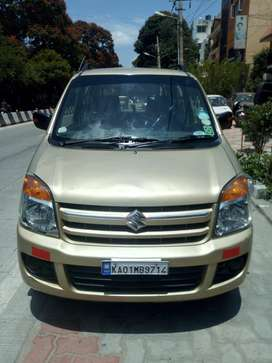

In [ ]:
# checking if the directory is correct
image = cv2.imread('KA9.jpg')
cv2_imshow(image)

In [ ]:
# getting text using modules
def get_text(path):
  img = cv2.imread(path)
  predicted_result = pytesseract.image_to_string(img, lang ='eng',
      config ='--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
  filter_predicted_result = "".join(predicted_result.split()).replace(":", "").replace("-", "")
  print(f"{path} : {filter_predicted_result}")
  print('\n')

def get_text_(path):
  img_obj = Image.open(path)
  text = pytesseract.image_to_string(img_obj)
  print(f"{path} : {text}")

get_text_('KA9.jpg')

KA9.jpg :  



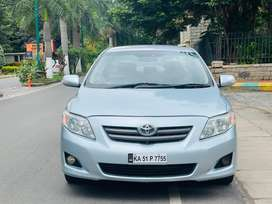

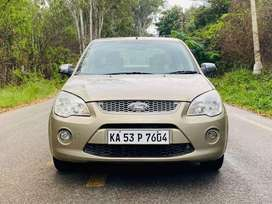

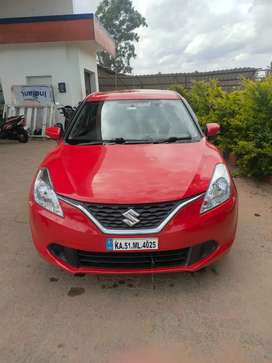

Ra

i



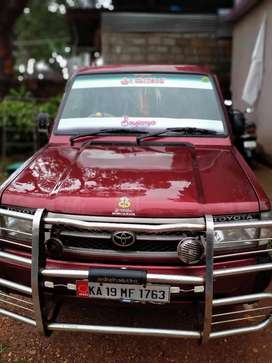

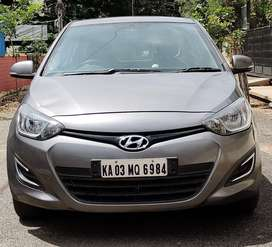

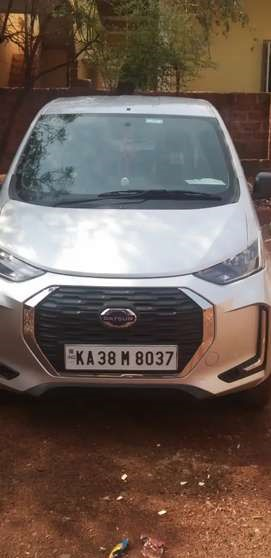

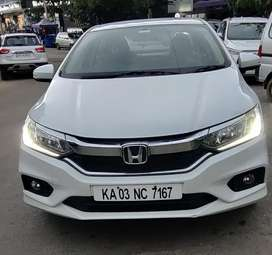

    
 

= ets vere => Es



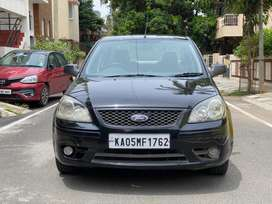

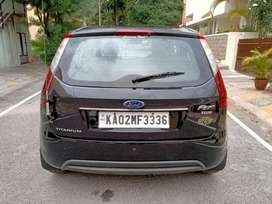

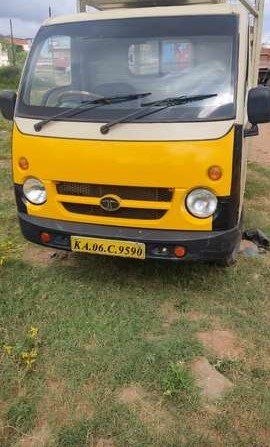

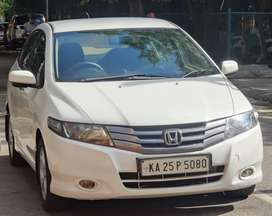

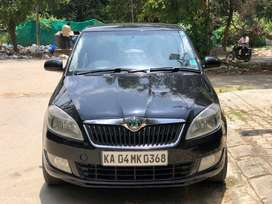

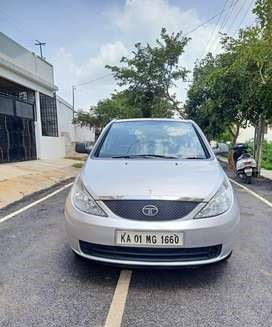

   

  
 

LKR oT WG ies
Sew,

 



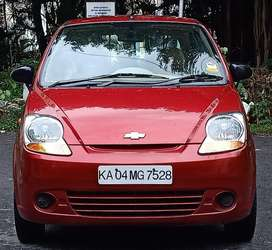

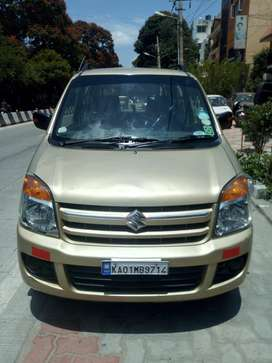

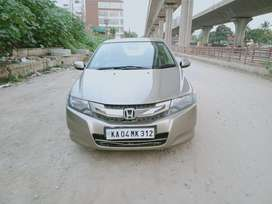

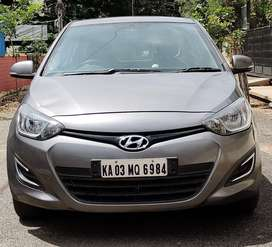

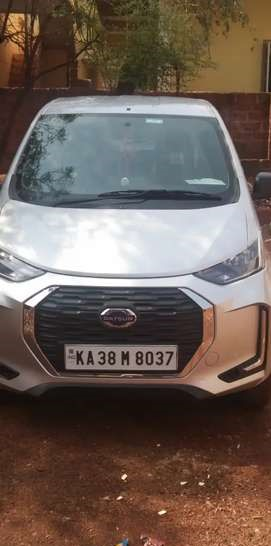

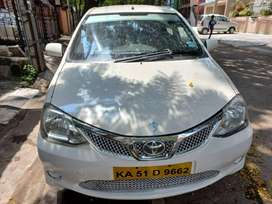

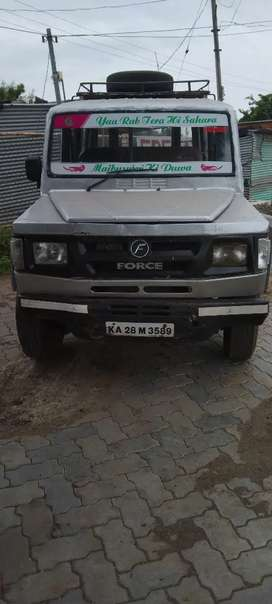

In [ ]:
# get all the photos for training the model
path_for_license_plates = os.getcwd() + "**/*.jpg"
# list_license_plates = []
# predicted_license_plates = []
  
for path_to_license_plate in glob.glob(path_for_license_plates, recursive = True):
  image = cv2.imread(path_to_license_plate)
  cv2_imshow(image)
  get_text_(path_to_license_plate)



In [ ]:
# applying some image transformations for feature extraction.
image = cv2.imread('KA19.jpg')

width,height = 200,200
pts1 = np.float32([[19,39],[94,38],[0,139],[82,140]])
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
imgOutput = cv2.warpPerspective(image,matrix,(width,height))

cv2_imshow(image)
cv2_imshow(imgOutput)

cv2.waitKey(0)


Saving plate2.jpg to plate2.jpg


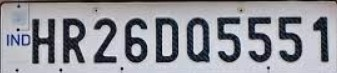

“HR26D05551



In [ ]:
from PIL import Image
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow
uploaded = files.upload()
path = list(uploaded.keys())[0]
# get_text(path)
img = cv2.imread(path)
cv2_imshow(img)

img_obj = Image.open(path)
text = pytesseract.image_to_string(img_obj)
print(text)
